#### Pymaceuticals Inc.
---

### Analysis
    
The Merged dataset has 1,893 records with 249 unique mice with one duplicate mice (g989) was deleted leaving 248 unique mice in the clean mice dataframe.
Observations: 
1. Stats: Capomulin has lowest mean of 40.675741, Meadian of 41.557809, variance of 24.947764, standard deviation of 4.994774	and Standered error mean 0.329346.of all the Drug Regimen summary stats.
2. Capomulin and Remicane has the highest number of Mice testings where as the control segment that was tested with Placebo was lowest of all the drugs.
3. Capomulin tratment is highly effective as it has a r-Value of  0.8419363424694721. 
4. There is highly correlated between mouse weight and the Tumor Volume with a correlation of 0.84
5. has a p_value of 1.3225722434712404e-07 and Sem of 0.12754359033201323 which means the weight and avg tumer volume are correlated.


In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cancer_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
cancer_study_complete 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [79]:
# Checking the number of mice.
mice_cnt = len(cancer_study_complete["Mouse ID"].value_counts())
mice_cnt

249

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_miceid  = cancer_study_complete[cancer_study_complete.duplicated(['Mouse ID',"Timepoint"])]
dup_miceid.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouceid_val = cancer_study_complete[(cancer_study_complete['Mouse ID'] == "g989")]

dupe_mouceid_val

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_cancer_study =  cancer_study_complete.loc[cancer_study_complete["Mouse ID"] != "g989"]  
clean_cancer_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [83]:
# Checking the number of mice in the clean DataFrame.
clean_cnt = len(clean_cancer_study["Mouse ID"].value_counts()) 
clean_cnt


248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

clean_cancer_mean = clean_cancer_study.groupby("Drug Regimen").mean()
clean_cancer_mean = clean_cancer_mean.reset_index(drop=False)
clean_cancer_mean = clean_cancer_mean[["Drug Regimen","Tumor Volume (mm3)"]]
#clean_cancer_mean

clean_cancer_median = clean_cancer_study.groupby("Drug Regimen").median()
clean_cancer_median = clean_cancer_median.reset_index(drop=False)
clean_cancer_median = clean_cancer_median[["Drug Regimen","Tumor Volume (mm3)"]]
#clean_cancer_median

clean_cancer_var = clean_cancer_study.groupby("Drug Regimen").var()
clean_cancer_var = clean_cancer_var.reset_index(drop=False)
clean_cancer_var = clean_cancer_var[["Drug Regimen","Tumor Volume (mm3)"]]
#clean_cancer_var

clean_cancer_std = clean_cancer_study.groupby("Drug Regimen").std()
clean_cancer_std = clean_cancer_std.reset_index(drop=False)
clean_cancer_std = clean_cancer_std[["Drug Regimen","Tumor Volume (mm3)"]]
#clean_cancer_std

clean_cancer_sem = clean_cancer_study.groupby("Drug Regimen").sem()
clean_cancer_sem = clean_cancer_sem.reset_index(drop=False)
clean_cancer_sem = clean_cancer_sem[["Drug Regimen","Tumor Volume (mm3)"]]
#clean_cancer_sem

# Assemble the resulting series into a single summary DataFrame.


cl_sum_df  = pd.merge(clean_cancer_mean,clean_cancer_median, on="Drug Regimen", how="right")
cl_sum_df.rename(columns = {'Tumor Volume (mm3)_x':'Mean_Tumor Volume','Tumor Volume (mm3)_y':'Meadian_Tumor Volume'}, inplace = True)
cl_sum_df

cl_sum_df  = pd.merge(cl_sum_df,clean_cancer_var, on="Drug Regimen", how="right")
cl_sum_df

cl_sum_df  = pd.merge(cl_sum_df,clean_cancer_std, on="Drug Regimen", how="right")
cl_sum_df.rename(columns = {'Tumor Volume (mm3)_x':'Var_Tumor Volume','Tumor Volume (mm3)_y':'Std_Tumor Volume'}, inplace = True)
cl_sum_df

cl_sum_df  = pd.merge(cl_sum_df,clean_cancer_sem, on="Drug Regimen", how="right")
cl_sum_df.rename(columns = {'Tumor Volume (mm3)':'Sem_Tumor Volume'}, inplace = True)
cl_sum_df



C:\Users\shara\AppData\Local\Temp\ipykernel_32824\2318116213.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_cancer_mean = clean_cancer_study.groupby("Drug Regimen").mean()
C:\Users\shara\AppData\Local\Temp\ipykernel_32824\2318116213.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_cancer_median = clean_cancer_study.groupby("Drug Regimen").median()
C:\Users\shara\AppData\Local\Temp\ipykernel_32824\2318116213.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only 

,Drug Regimen,Mean_Tumor Volume,Meadian_Tumor Volume,Var_Tumor Volume,Std_Tumor Volume,Sem_Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.



clean_cancer_summ = clean_cancer_study.groupby('Drug Regimen').agg(Min_Tumor_Volume=('Tumor Volume (mm3)','min'), 
                                                                   Max_Tumor_Volume=('Tumor Volume (mm3)','max'),
                                                                   Mean_Tumor_Volume=('Tumor Volume (mm3)','mean'),
                                                                   Median_Tumor_Volume=('Tumor Volume (mm3)','median'),
                                                                   Std_Tumor_Volume=('Tumor Volume (mm3)', 'std'),
                                                                   Var_Tumor_Volume=('Tumor Volume (mm3)','var'),
                                                                   Sem_Tumor_Volume=('Tumor Volume (mm3)', 'sem'))

clean_cancer_summ = clean_cancer_summ.reset_index(drop=False)
clean_cancer_summ




,Drug Regimen,Min_Tumor_Volume,Max_Tumor_Volume,Mean_Tumor_Volume,Median_Tumor_Volume,Std_Tumor_Volume,Var_Tumor_Volume,Sem_Tumor_Volume
0,Capomulin,23.343598,48.158209,40.675741,41.557809,4.994774,24.947764,0.329346
1,Ceftamin,45.000000,68.923185,52.591172,51.776157,6.268188,39.290177,0.469821
2,Infubinol,36.321346,72.226731,52.884795,51.820584,6.567243,43.128684,0.492236
3,Ketapril,45.000000,78.567014,55.235638,53.698743,8.279709,68.553577,0.603860
4,Naftisol,45.000000,76.668817,54.331565,52.509285,8.134708,66.173479,0.596466
5,Placebo,45.000000,73.212939,54.033581,52.288934,7.821003,61.168083,0.581331
6,Propriva,45.000000,72.455421,52.320930,50.446266,6.622085,43.852013,0.544332
7,Ramicane,22.050126,47.622816,40.216745,40.673236,4.846308,23.486704,0.320955
8,Stelasyn,45.000000,75.123690,54.233149,52.431737,7.710419,59.450562,0.573111
9,Zoniferol,45.000000,73.324432,53.236507,51.818479,6.966589,48.533355,0.516398


## Bar and Pie Charts

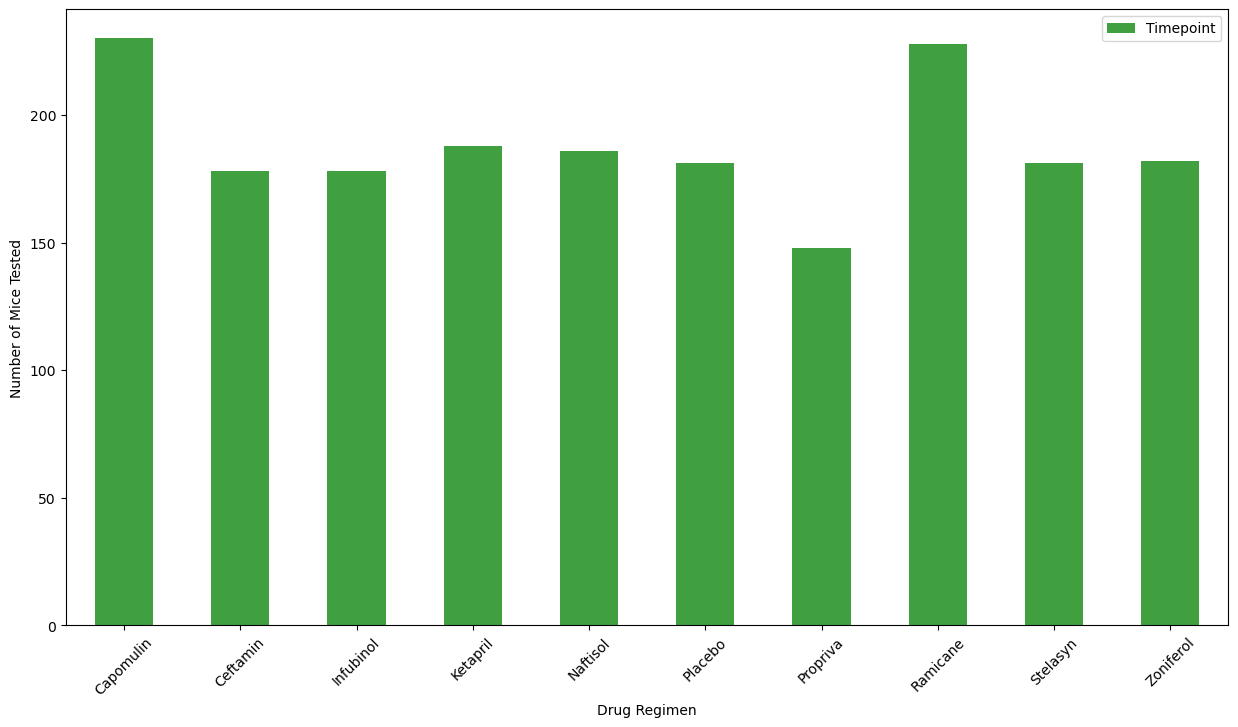

<Figure size 640x480 with 0 Axes>

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_df = clean_cancer_study.groupby('Drug Regimen').count()
bar_plot_df = bar_plot_df.reset_index(drop=False)
bar_plot_df

bar_drg_tm_df = bar_plot_df[["Drug Regimen","Timepoint"]]
tick_plot = bar_drg_tm_df.plot(kind="bar", figsize=(15,8), color ="green",align = "center", alpha = .75)

# setting the label to display with 45 degree angle
tick_plot.set_xticklabels(bar_drg_tm_df["Drug Regimen"], rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()


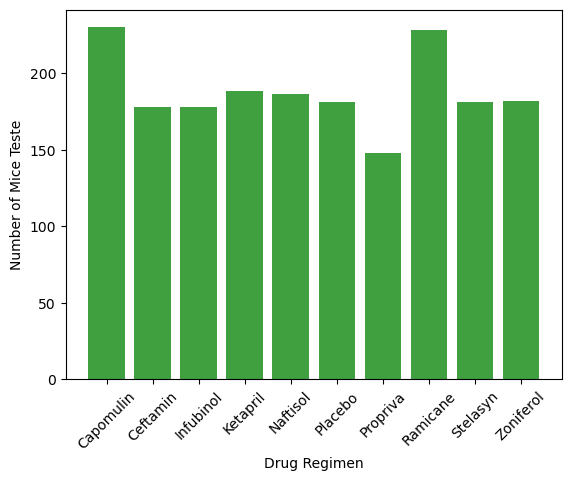

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import matplotlib.pyplot as plt

bar_plot_df = clean_cancer_study.groupby('Drug Regimen').count()
bar_plot_df = bar_plot_df.reset_index(drop=False)
bar_plot_df

x_axis = bar_plot_df["Drug Regimen"]
y_axis = bar_plot_df["Timepoint"]
y_pos = np.arange(len(bar_plot_df["Drug Regimen"]))
tick_val =  bar_plot_df["Drug Regimen"]
plt.bar(x_axis, y_axis,  color ="green", align='center', alpha=0.75)
plt.xticks(y_pos,tick_val, rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel('Number of Mice Teste')

plt.show()


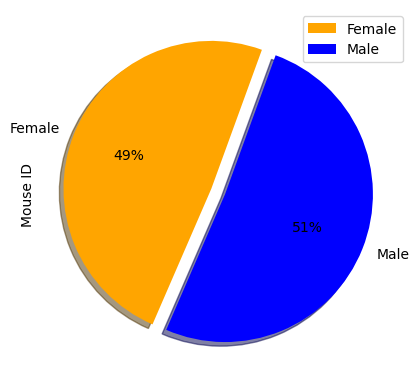

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_df = clean_cancer_study.groupby('Sex').count()["Mouse ID"]
pie_plot_df = pie_plot_df.reset_index(drop=False)
pie_plot_df

colors = ["orange", "blue"]
labels = pie_plot_df["Sex"]
explode = (0.1,0)

# Plotting the pie chart for above dataframe
# and rotating the pie chart by 60 degrees
pie_plot_df.plot(kind='pie', y="Mouse ID", explode = explode, colors = colors, labels = labels, autopct='%1.0f%%', startangle = 70, shadow = True)

plt.show()

In [89]:
pie_plot_df = clean_cancer_study.groupby('Sex').count()["Mouse ID"]
pie_plot_df = pie_plot_df.reset_index(drop=False)
pie_plot_df


,Sex,Mouse ID
0,Female,922
1,Male,958


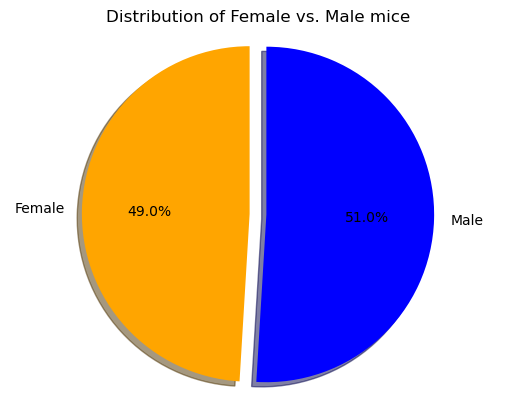

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
pie_plot_df = clean_cancer_study.groupby('Sex').count()["Mouse ID"]
pie_plot_df = pie_plot_df.reset_index(drop=False)
pie_plot_df

plt.title("Distribution of Female vs. Male mice")
colors = ["orange", "blue"]
labels = pie_plot_df["Sex"]
explode = (0.1,0)

plt.pie(pie_plot_df["Mouse ID"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_fnl_summ = clean_cancer_study.loc[clean_cancer_study['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
clean_fnl_summ

# Start by getting the last (greatest) timepoint for each mouse
clean_max_tp = clean_fnl_summ.groupby("Mouse ID").max()['Timepoint']
clean_max_tp = clean_max_tp.reset_index(drop=False)
clean_max_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mrg_max_tp  = pd.merge(clean_max_tp,clean_cancer_study, on=["Mouse ID",'Timepoint'], how="left")
mrg_max_tp.rename(columns = {'Tumor Volume (mm3)':'Tumor Volume'}, inplace = True)
mrg_max_tp 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
samp = clean_cancer_study['Drug Regimen'].count()
samp_size = clean_cancer_study['Mouse ID'].count()
treatment_lst_df = [clean_cancer_study.sample(samp_size) for x in range(0,samp)]
treatment_lst_df

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_plot_lst = []
tum_vol_plot_lst = clean_fnl_summ['Tumor Volume (mm3)']
tum_vol_plot_lst

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = clean_cancer_study['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol  is: {upperq}")
print(f"The interquartile range of Tumor Vol  is: {iqr}")
print(f"The the median of Tumor Vol  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Determine outliers using upper and lower bounds
outlier_Tumor_Vol  = clean_cancer_study.loc[(clean_cancer_study['Tumor Volume (mm3)'] < lower_bound) | (clean_cancer_study['Tumor Volume (mm3)'] > upper_bound)]
outlier_Tumor_Vol  

# Locate the rows which contain mice on each drug and get the tumor volumes
mice_oneach_drg = clean_cancer_study.loc[(clean_cancer_study['Tumor Volume (mm3)'] >= lower_bound) & (clean_cancer_study['Tumor Volume (mm3)'] <= upper_bound)]
mice_oneach_drg

# add subset 
#smaller popolation sample
print("***************************************************************************************")
print("********************************Sample size of 100*************************************")
print("***************************************************************************************")  


subset_l = mice_oneach_drg.sample(100)

quartiles_l = subset_l['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_l = quartiles[0.25]
upperq_l = quartiles[0.75]
iqr_l = upperq_l-lowerq_l
print(f"The lower quartile of Tumor Vol is: {lowerq_l}")
print(f"The upper quartile of Tumor Vol  is: {upperq_l}")
print(f"The interquartile range of Tumor Vol  is: {iqr_l}")
print(f"The the median of Tumor Vol  is: {quartiles_l[0.5]} ")

lower_bound_l = lowerq_l - (1.5*iqr)
upper_bound_l = upperq_l + (1.5*iqr)

print(f"Values below {lower_bound_l} could be outliers.")
print(f"Values above {upper_bound_l} could be outliers.")


# Locate the rows which contain mice on each drug and get the tumor volumes
mice_oneach_samp_l = subset_l.loc[(subset_l['Tumor Volume (mm3)'] >= lower_bound_l) & (subset_l['Tumor Volume (mm3)'] <= upper_bound_l)]
mice_oneach_samp_l

print("***************************************************************************************")
print("********************************Sample size of 600************************************")
print("***************************************************************************************")  

# larger population set
subset_u = mice_oneach_drg.sample(600)

quartiles_u = subset_u['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_u = quartiles[0.25]
upperq_u = quartiles[0.75]
iqr_u = upperq_u-lowerq_u
print(f"The lower quartile of Tumor Vol is: {lowerq_u}")
print(f"The upper quartile of Tumor Vol  is: {upperq_u}")
print(f"The interquartile range of Tumor Vol  is: {iqr_u}")
print(f"The the median of Tumor Vol  is: {quartiles_u[0.5]} ")

lower_bound_u = lowerq_u - (1.5*iqr)
upper_bound_u = upperq_u + (1.5*iqr)

print(f"Values below {lower_bound_u} could be outliers.")
print(f"Values above {upper_bound_u} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes
mice_oneach_samp_u = subset_u.loc[(subset_u['Tumor Volume (mm3)'] >= lower_bound_u) & (subset_u['Tumor Volume (mm3)'] <= upper_bound_u)]
mice_oneach_samp_u   
    
#mice_oneach_drg  
#outlier_Tumor_Vol

The lower quartile of Tumor Vol is: 45.0
The upper quartile of Tumor Vol  is: 56.32407510749999
The interquartile range of Tumor Vol  is: 11.324075107499993
The the median of Tumor Vol  is: 48.933453655 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.
***************************************************************************************
********************************Sample size of 100*************************************
***************************************************************************************
The lower quartile of Tumor Vol is: 45.0
The upper quartile of Tumor Vol  is: 56.32407510749999
The interquartile range of Tumor Vol  is: 11.324075107499993
The the median of Tumor Vol  is: 48.979364419999996 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.
***************************************************************************************
********************************Sa

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1532,t198,Propriva,Male,22,26,5,47.461261,0
298,b742,Capomulin,Male,7,21,40,38.255627,0
1844,y769,Ceftamin,Female,6,27,40,64.251028,4
1695,w422,Ketapril,Female,18,26,5,48.457459,0
889,g558,Propriva,Male,8,29,20,55.090097,1
...,...,...,...,...,...,...,...,...
768,e213,Naftisol,Male,8,27,15,51.791695,2
357,g316,Capomulin,Female,22,22,30,44.221480,2
1679,w193,Infubinol,Male,22,30,0,45.000000,0
1011,j755,Naftisol,Male,23,27,35,62.732858,1


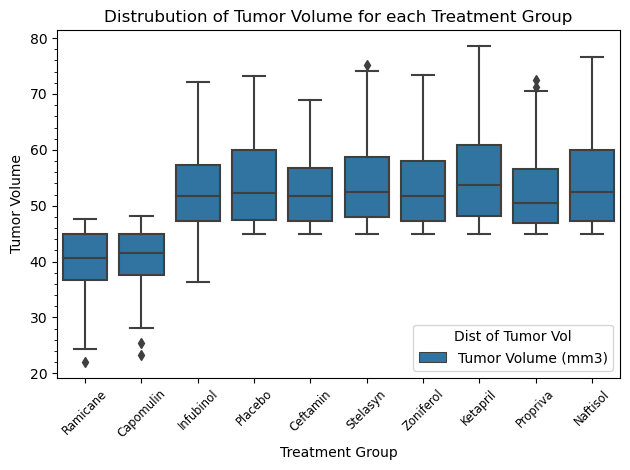

In [93]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dd=pd.melt(clean_cancer_study,id_vars=['Drug Regimen'],value_vars=['Tumor Volume (mm3)'],var_name='Dist of Tumor Vol')
sns.boxplot(x='Drug Regimen',y='value',data=dd,hue='Dist of Tumor Vol')


# Axis details
plt.title('Distrubution of Tumor Volume for each Treatment Group')
plt.ylabel('Tumor Volume')
plt.xlabel('Treatment Group')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small', rotation = 45)

plt.tight_layout()
#diplay figure
plt.show()


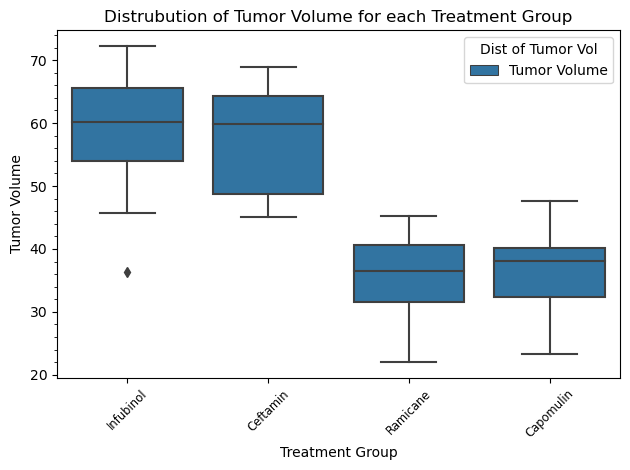

In [94]:

# Generate a box plot that shows the distrubution of the tumor volume for the four treatment groups.
dd=pd.melt(mrg_max_tp,id_vars=['Drug Regimen'],value_vars=['Tumor Volume'],var_name='Dist of Tumor Vol')
sns.boxplot(x='Drug Regimen',y='value',data=dd,hue='Dist of Tumor Vol')


# Axis details
plt.title('Distrubution of Tumor Volume for each Treatment Group')
plt.ylabel('Tumor Volume')
plt.xlabel('Treatment Group')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small', rotation = 45)

plt.tight_layout()
#diplay figure
plt.show()

## Line and Scatter Plots

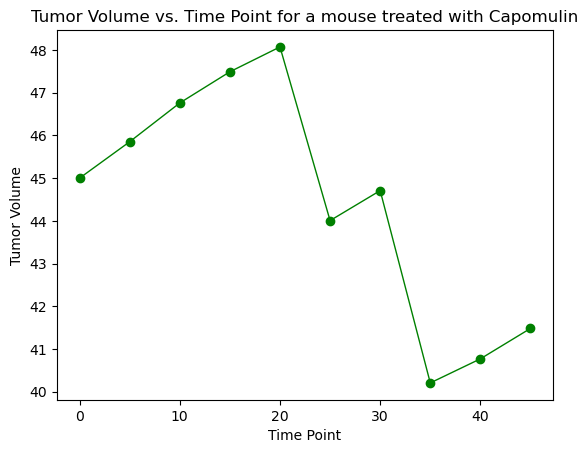

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = clean_fnl_summ.loc[(clean_fnl_summ['Mouse ID'] == "l509")] 
line_plot_df

line_plot_df =line_plot_df[["Timepoint",'Tumor Volume (mm3)' ]]
line_plot_df

y_axis = line_plot_df['Tumor Volume (mm3)']
x_axis = line_plot_df['Timepoint']

plt.plot(x_axis, y_axis, linewidth=1, marker="o", color="g")
plt.title('Tumor Volume vs. Time Point for a mouse treated with Capomulin')
plt.ylabel( "Tumor Volume")
plt.xlabel("Time Point")

plt.show()


C:\Users\shara\AppData\Local\Temp\ipykernel_32824\991176066.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatt_plot_df = scatter_plot_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
C:\Users\shara\AppData\Local\Temp\ipykernel_32824\991176066.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatt_plot_wt = scatter_plot_df.groupby(["Mouse ID"]).mean()["Weight (g)"]


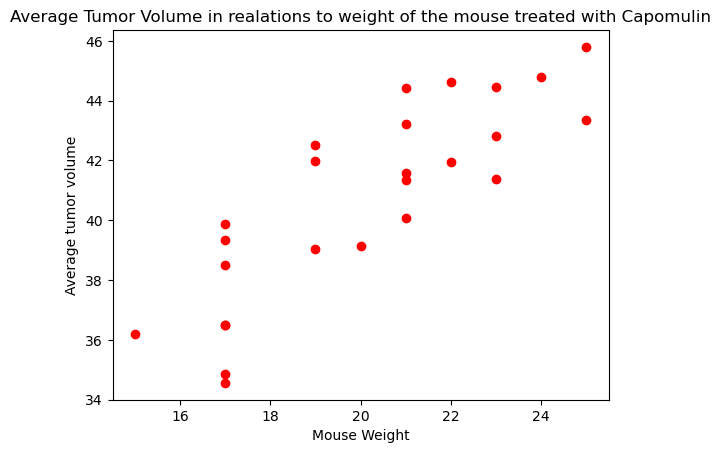

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_plot_df = clean_fnl_summ.loc[(clean_fnl_summ['Drug Regimen'] == "Capomulin")] 
scatter_plot_df = scatter_plot_df.reset_index(drop=False)
scatter_plot_df

scatt_plot_df = scatter_plot_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
scatt_plot_df = scatt_plot_df.reset_index()
scatt_plot_df

y_axis_val = scatt_plot_df["Tumor Volume (mm3)"]
y_axis_val

scatt_plot_wt = scatter_plot_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
scatt_plot_wt = scatt_plot_wt.reset_index()
scatt_plot_wt

x_axis_val = scatt_plot_wt["Weight (g)"]
x_axis_val

plt.scatter(x_axis_val,y_axis_val, color="red")

plt.title('Average Tumor Volume in realations to weight of the mouse treated with Capomulin')
plt.ylabel('Average tumor volume')
plt.xlabel('Mouse Weight')

plt.show()
 

## Correlation and Regression

0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64
0.9544396890241049 21.552160532685008 0.8419363424694721 1.3225722434712404e-07 0.12754359033201323
The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


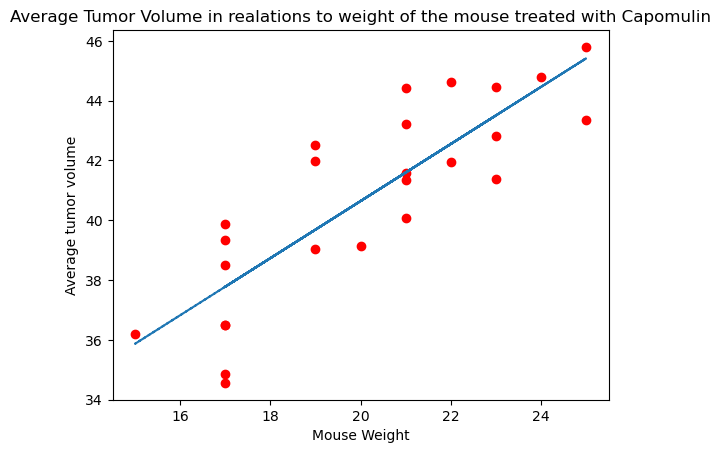

In [97]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

y_axis_val = scatt_plot_df["Tumor Volume (mm3)"]
x_axis_val = scatt_plot_wt["Weight (g)"]

d_slope, d_intercept, d_rvalu, d_pvalue, d_std_err = st.linregress( x_axis_val, y_axis_val)

d_fit = (d_slope * x_axis_val )+ d_intercept
print(d_fit)
print(d_slope,d_intercept, d_rvalu,d_pvalue, d_std_err )
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_axis_val,y_axis_val)[0],2)}")

plt.scatter(x_axis_val,y_axis_val, color="red")

plt.plot(x_axis_val,d_fit,"--")

plt.title('Average Tumor Volume in realations to weight of the mouse treated with Capomulin')
plt.ylabel('Average tumor volume')
plt.xlabel('Mouse Weight')

plt.show()